In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
#from pyAgrum.lib.pretty_print import pretty_cpt

from IPython.display import display, Math, Latex

# Exercice 3

Trois coffres contiennent respectivement une pièce d'or et une pièce d'argent, 2 pièces d'or et 2 pièces d'argent. On choisit une pièce dans un des trois coffres. C'est une pièce d'or. Quelle est la probabilité pour que la seconde pièce soit également en or ?
(Problème posé par le mathématicient Joseph Bertrand)

In [2]:
bn=gum.BayesNet()

C=bn.add(gum.RangeVariable("C","Coffre",1,3))
P1=bn.add(gum.LabelizedVariable("P1","Piece 1",["Or","Argent"]))
P2=bn.add(gum.LabelizedVariable("P2","Piece 2",["Or","Argent"]))

In [3]:
bn.addArc(C,P1)
bn.addArc(C,P2)
bn.addArc(P1,P2)

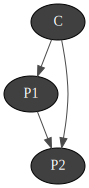

In [4]:
gnb.showBN(bn)

In [5]:
bn.cpt(C).fillWith([1]*3).normalize()

(gum::Potential<double>@0x24d0aa0) <C:1> :: 0.333333 /<C:2> :: 0.333333 /<C:3> :: 0.333333

In [6]:
bn.cpt(P1).fillWith([1/2,1/2,1,0,0,1])

(gum::Potential<double>@0x25804e0) <P1:Or|C:1> :: 0.5 /<P1:Argent|C:1> :: 0.5 /<P1:Or|C:2> :: 1 /<P1:Argent|C:2> :: 0 /<P1:Or|C:3> :: 0 /<P1:Argent|C:3> :: 1

In [7]:
bn.cpt(P2).fillWith([0,1,1,0,1/2,1/2,1,0,1/2,1/2,0,1])

(gum::Potential<double>@0x220e640) <P2:Or|C:1|P1:Or> :: 0 /<P2:Argent|C:1|P1:Or> :: 1 /<P2:Or|C:2|P1:Or> :: 1 /<P2:Argent|C:2|P1:Or> :: 0 /<P2:Or|C:3|P1:Or> :: 0.5 /<P2:Argent|C:3|P1:Or> :: 0.5 /<P2:Or|C:1|P1:Argent> :: 1 /<P2:Argent|C:1|P1:Argent> :: 0 /<P2:Or|C:2|P1:Argent> :: 0.5 /<P2:Argent|C:2|P1:Argent> :: 0.5 /<P2:Or|C:3|P1:Argent> :: 0 /<P2:Argent|C:3|P1:Argent> :: 1

In [8]:
ie=gum.LazyPropagation(bn)
ie.setEvidence({'P1': "Or"}) 
ie.makeInference()
ie.posterior(P2)

(gum::Potential<double>@0x2643f10) <P2:Or> :: 0.666667 /<P2:Argent> :: 0.333333